In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#初始化数据集
n = 1000
X = np.linspace(0,1,n)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y = np.sin(2*np.pi*X)   # y = sin(x)
Y_L = Y +  np.random.normal(0,0.2,n) # 目标值 + 噪音（符合高斯分布）

In [3]:
# 采用 close form solution方法求系数 w 的值
# 线性方程为 y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
order = 15
m = order + 1
fi = np.zeros((n,m)) # 
i = 0
for x in X:
    for j in range(m):
        fi[i][j] = pow(x,j)
    i = i + 1
fi_t = fi.transpose()
w = np.dot(np.dot(np.linalg.inv(np.dot(fi_t,fi)),fi_t),Y_L)  # 应用求系数的公式
print(w)

[-3.45749026e-01  2.29776066e+01 -3.16112270e+02  2.67065425e+03
 -9.59703646e+03 -5.14617561e+03  1.61531697e+05 -5.80914616e+05
  9.62883488e+05 -5.75554457e+05 -5.76565676e+05  1.24050247e+06
 -7.26191698e+05 -3.01163509e+04  1.95081129e+05 -5.82896992e+04]


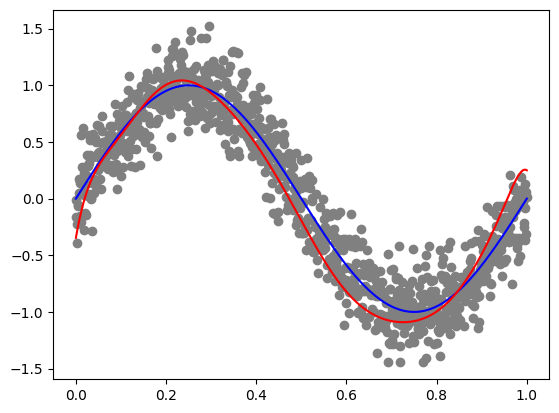

In [4]:
#绘制样例数据
plt.scatter(X,Y_L,color='grey')

#绘制原始曲线： y = sin(x)曲线
n1 = 500
X_1 = np.linspace(0,1,n1)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y_1 = np.sin(2*np.pi*X_1)   # y = sin(x)
plt.plot(X_1,Y_1,color='blue')

# #绘制拟合函数线性函数的曲线：y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
Y_2 = []
for x in X_1:
    y = 0
    for j in range(m):
        y += w[j]*pow(x,j)  
    Y_2.append(y) 
plt.plot(X_1,Y_2,color='red')